<a href="https://colab.research.google.com/github/arom0808/aesc-ml-task-anom_ege/blob/main/HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация ЕГЭ (4 если сделаны все задачи)

Рядом лежат данные с координатами точек. Везде используется Евклидово расстояние. Кластером считается набор не менее чем из 30 точек связанных друг с другом. Аномалия это точка находящаяся на расстоянии более 1 от любого кластера.

* Постройте Распределение точек
* Напишите руками DBSCAN и обработайте им все файлы
* Файл 0.xls также решите руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Отметьте Аномалии отдельным цветом
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите два числа - Среднее абсцисс и ординат центроидов кластеров * 100000

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from sys import setrecursionlimit

setrecursionlimit(100000)


Задача 0

In [15]:
def euclid_dist(a, b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**(0.5)

def plus(a, b):
    return (a[0] + b[0], a[1] + b[1])

def div(a, b):
    return (a[0]/b,a[1]/b)

def mult_scal(a, b):
    return (a[0] * b, a[1] * b)

def mult(a, b):
    return a[0] * b[1] - a[1] * b[0]

def minus(a, b):
    return (a[0] - b[0], a[1] - b[1])

def find_free_id(colors):
    for i in range(len(colors)):
        if colors[i] == 0:
            return i
    return len(colors)

def color_cluster(points, colors, radius, v, color):
    if colors[v]:
        return 0
    colors[v] = color
    res = 1
    for u in range(len(points)):
        if euclid_dist(points[v], points[u]) <= radius:
            res += color_cluster(points, colors, radius, u, color)
    return res

def dbscan(points, radius, min_count):
    colors = [0] * len(points)
    next_color = 1
    proceed_count = 0
    while proceed_count < len(points):
        start_id = find_free_id(colors)
        if start_id == len(points):
            print(colors)
            print("Blyat")
        cluster_size = color_cluster(points, colors, radius, start_id, next_color)
        if cluster_size < min_count:
            for i in range(len(colors)):
                if colors[i] == next_color:
                    colors[i] = -1
        else:
            next_color += 1
        proceed_count += cluster_size
    for i in range(len(colors)):
        if colors[i] > 0:
            colors[i] -= 1
    return (next_color - 1, colors)

def get_points_from_file(filename):
    points_file = open(filename,"r")
    str_points = points_file.read().replace(',', '.').split("\n")
    points_file.close()
    return [tuple(map(float, cs.split(' '))) for cs in str_points]

def paint_graph(colors_cnt, points, colors):
    anom_points = list(map(list, zip(*[p for (i, p) in enumerate(points) if colors[i] == -1])))
    points_by_clusters = [list(map(list, zip(*[p for (i, p) in enumerate(points) if colors[i] == col]))) for col in range(colors_cnt)]
    colors_list = list(matplotlib.colors._colors_full_map.values())
    colors_list[0] = "#ff0000"
    plt.scatter(anom_points[0], anom_points[1], c=colors_list[0])
    for i in range(colors_cnt):
        plt.scatter(points_by_clusters[i][0], points_by_clusters[i][1], c=colors_list[i+1])

def find_centroid(points):
    best_ans, best_dist = points[0], 1e18
    for cp in points:
        cur_dist = 0
        for p in points:
            cur_dist += euclid_dist(cp, p)
        if cur_dist < best_dist:
            best_ans, best_dist = cp, cur_dist
    return best_ans

def arithm_mean(points):
    res = (0, 0)
    for p in points:
        res = plus(res, p)
    return div(res, len(points))

def get_points_by_clusters(points, colors, colors_cnt):
    return [[p for (i, p) in enumerate(points) if colors[i] == col] for col in range(colors_cnt)]

def sign_by_line(point, line):
    return mult(minus(line[1], line[0]), minus(point, line[0]))

(43744.97205, -47901.122299999995)


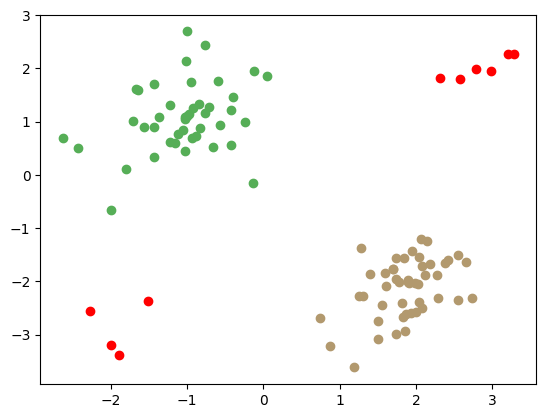

In [16]:
def task_0():
    points = get_points_from_file("0.txt")
    colors_cnt, colors = dbscan(points, 1, 30)
    paint_graph(colors_cnt, points, colors)
    pbc = get_points_by_clusters(points, colors, colors_cnt)
    centroids = [find_centroid(ps) for ps in pbc]
    print(mult_scal(arithm_mean(centroids),100000))


task_0()

Задача 0 ручками

(43744.97205, -47901.122299999995)


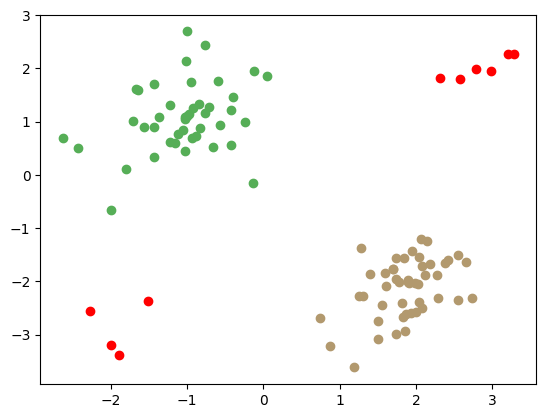

In [17]:
def task_0_hands():
    points = get_points_from_file("0.txt")
    lines = [((-2,-2),(3,0)), ((0,-2),(1,2))]
    colors = [0] * len(points)
    for i in range(len(points)):
        if sign_by_line(points[i], lines[0])>0 and sign_by_line(points[i], lines[1])>0:
            colors[i] = 0
        elif sign_by_line(points[i], lines[0])<0 and sign_by_line(points[i], lines[1])<0:
            colors[i] = 1
        else:
            colors[i] =-1
    colors_cnt = 2
    paint_graph(colors_cnt, points, colors)
    pbc = get_points_by_clusters(points, colors, colors_cnt)
    centroids = [find_centroid(ps) for ps in pbc]
    print(mult_scal(arithm_mean(centroids),100000))


task_0_hands()

Задача 1

(99895.1613, 100091.52173333333)


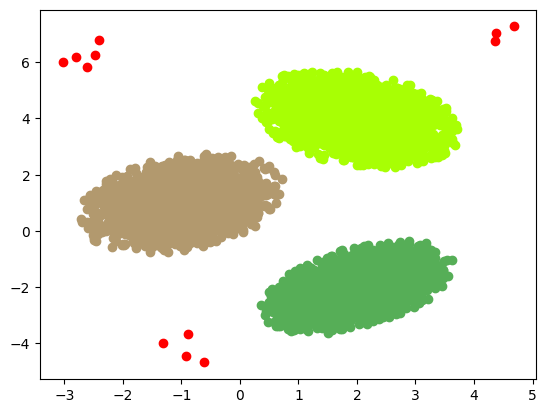

In [18]:
def task_1():
    points = get_points_from_file("1.txt")
    colors_cnt, colors = dbscan(points, 1, 30)
    line = ((0,4),(1,2))
    for i in range(len(points)):
        if colors[i] == 1 and sign_by_line(points[i], line)>0:
            colors[i] = colors_cnt
    colors_cnt+=1
    paint_graph(colors_cnt, points, colors)
    pbc = get_points_by_clusters(points, colors, colors_cnt)
    centroids = [find_centroid(ps) for ps in pbc]
    print(mult_scal(arithm_mean(centroids),100000))


task_1()

(515933.15322412294, 498987.0954832535)


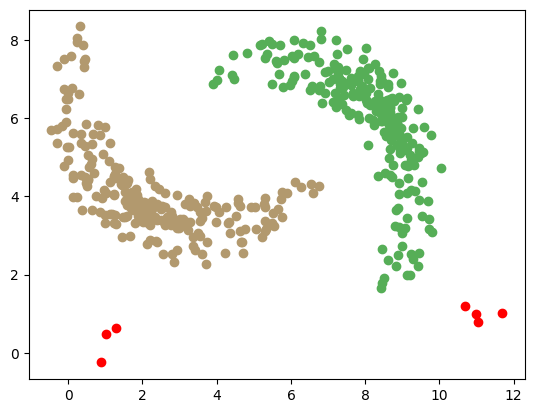

In [19]:
def task_2():
    points = get_points_from_file("2.txt")
    colors_cnt, colors = dbscan(points, 1, 30)
    paint_graph(colors_cnt, points, colors)
    pbc = get_points_by_clusters(points, colors, colors_cnt)
    centroids = [find_centroid(ps) for ps in pbc]
    print(mult_scal(arithm_mean(centroids),100000))


task_2()

(471077.2743145156, 409201.5147101898)


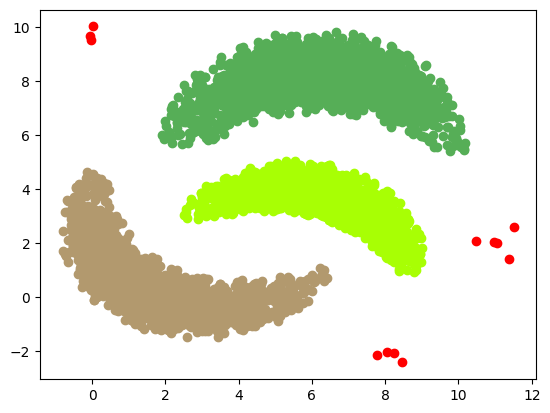

In [20]:
def task_3():
    points = get_points_from_file("3.txt")
    colors_cnt, colors = dbscan(points, 1, 30)
    paint_graph(colors_cnt, points, colors)
    pbc = get_points_by_clusters(points, colors, colors_cnt)
    centroids = [find_centroid(ps) for ps in pbc]
    print(mult_scal(arithm_mean(centroids),100000))


task_3()

(528073.6080153874, 71781.45605679341)


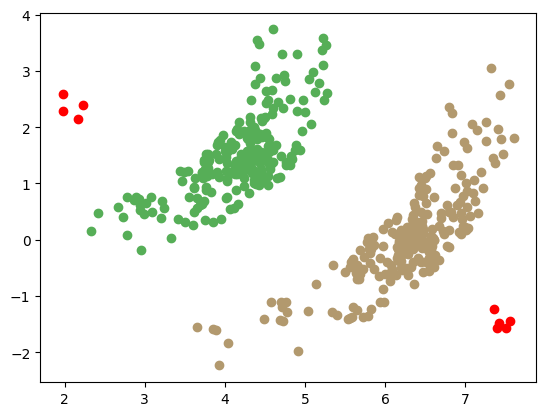

In [21]:
def task_4():
    points = get_points_from_file("4.txt")
    colors_cnt, colors = dbscan(points, 1, 30)
    paint_graph(colors_cnt, points, colors)
    pbc = get_points_by_clusters(points, colors, colors_cnt)
    centroids = [find_centroid(ps) for ps in pbc]
    print(mult_scal(arithm_mean(centroids),100000))


task_4()

(669946.6490070053, 370701.4765422124)


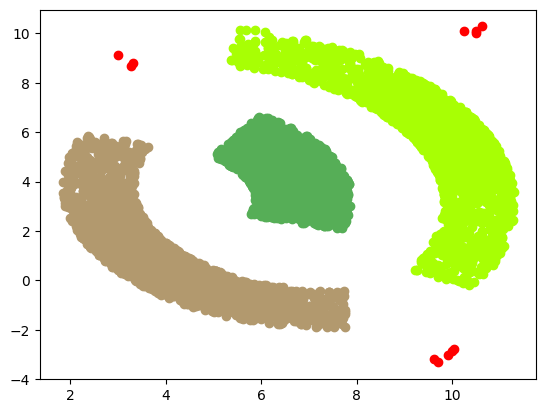

In [22]:
def task_5():
    points = get_points_from_file("5.txt")
    colors_cnt, colors = dbscan(points, 1, 30)
    paint_graph(colors_cnt, points, colors)
    pbc = get_points_by_clusters(points, colors, colors_cnt)
    centroids = [find_centroid(ps) for ps in pbc]
    print(mult_scal(arithm_mean(centroids),100000))


task_5()

# Кластеризация (1 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [37]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.cluster import MeanShift, SpectralClustering, AgglomerativeClustering, OPTICS
from sklearn.mixture import GaussianMixture

In [38]:
# two_means =
# dbscan =

clustering_algorithms = ( ("MeanShift", MeanShift()),
        ("Spectral\nClustering", SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')),
        ("Ward", AgglomerativeClustering(n_clusters=3, linkage='ward')),
        ("Agglomerative\nClustering", AgglomerativeClustering(n_clusters=3, linkage='average')),
        ("OPTICS", OPTICS(min_samples=10)),
        ("Gaussian\nMixture", GaussianMixture(n_components=3))
    )

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_agglomerative.py:596: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 78 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connect

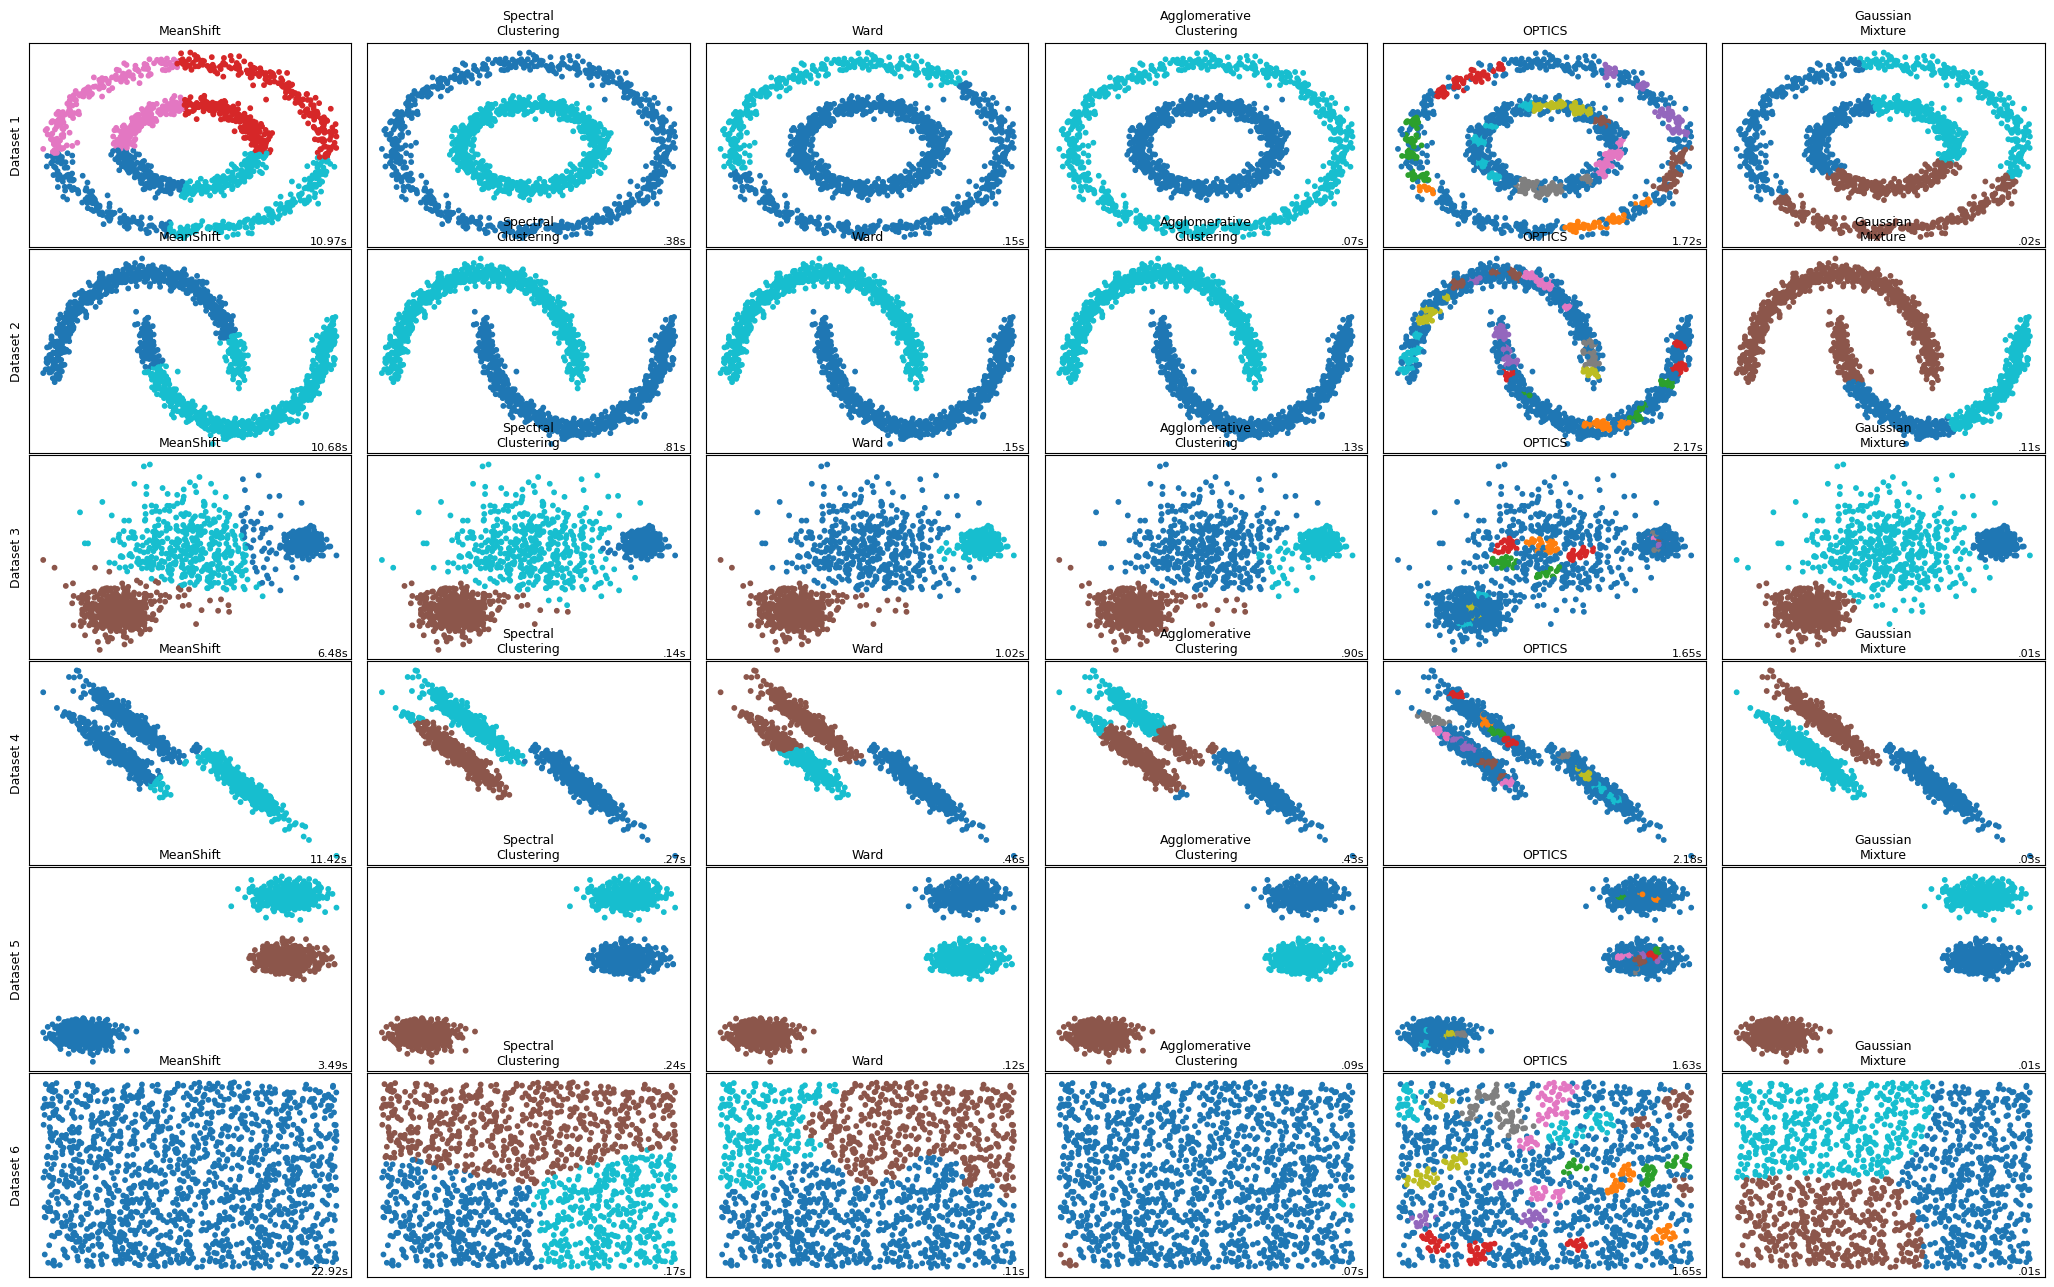

In [42]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

my_datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(my_datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        # Особые случаи (например, MeanShift — требует bandwidth, GMM — predict)
        if name == "MeanShift":
            algorithm.set_params(bandwidth=bandwidth)
        if name in ["Ward", "Agglomerative\nClustering"]:
            algorithm.set_params(connectivity=connectivity)
        if hasattr(algorithm, "n_clusters") and "n_clusters" in params:
            algorithm.set_params(n_clusters=params["n_clusters"])
        # Fit and predict
        if hasattr(algorithm, "fit_predict"):
            y_pred = algorithm.fit_predict(X)
        else:
            algorithm.fit(X)
            y_pred = algorithm.predict(X)

        t1 = time.time()
        plt.subplot(len(my_datasets), len(clustering_algorithms), plot_num)
        plt.title(name, fontsize=9)
        plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred, cmap="tab10")
        plt.xticks([])
        plt.yticks([])
        if plot_num % len(clustering_algorithms) == 1:
            plt.ylabel(f"Dataset {i_dataset + 1}", fontsize=9)
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=8,
            horizontalalignment="right",
        )
        plot_num += 1